<hr>
# Regression
<br>
<br>
<font size=5>The main objective in this case will be to infer a specific value of the output variable using the available features.Both, linear and non-linear regression methods are commonly used in this stage. </font>
<br>
<br>
<font size=5> If the process is assumed linear, let "X"  be a phenomenological dynamics composed by n instances of p variables, where the regression problem consists of finding q relations in the following way</font>
<br>
<br>
<font size=5> <center>  $\mathbf{Y_i} = \mathbf{X}\boldsymbol{\beta}_i + \mathbf{u}_i$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $i=1,2...,q$ </font>  
 <br>
 <font size=5>Which allow to optimally foresee the $\mathbf{Y_i}$ variables, by means of the regression coefficients $\boldsymbol{\beta}_i$ and a disturbance variable $\mathbf{u}_i$. </font>
<br>
 <font size=5>Likewise, a nonlinear regression is associated to a function f applied to a space "X"  and can be understood as
<br>
<center>  $\mathbf{Y_i}\sim f(\mathbf{X},\boldsymbol{\beta}_i,\mathbf{u}_i)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$i=1,…,q$</font>  	


<hr>
# Linear Regression
<br>
<br>
<font size=5>Lét's start with linear regresion for one varible. We will study that through an example. </font>
<br>
<br>

<hr>
# Example
<br>
<br>
<font size=4>This example and some of the related code is taken from:
<br>
<br>
- The MIT opencourse Introduction to Computational Thinking and Data Science, lecture 9. 
<br>
You can find it in:
<br>
https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-slides-and-files/ 
<br>
<br>
- The Machine learning course form Coursera, ofered by Standford University. 
<br>
You can find it in:
<br>
https://www.coursera.org/learn/machine-learning
</font><br>
<br>
<br>
<br>
<font size=5> **Hooke's law**</font>

<br>
<br>
<font size=5>Lest's consider hooke's law. </font>
<br>
<br>
<img src="pictures/springexample.jpg"/>
<br>
<font size=5>Suppose we don’t have a model for this process, but we have experimental data.Like the one in the table.
</font>
<br>
<br>
<img src="pictures/trainingdatalr.jpg"/>
<br>
<br>
<font size=5>First thing we are going to do is plot data. In the following cells you will find code for importing and ploting the database. Run the code in the following cell to define fuctions to det dataset from file and plot it.
</font>

In [4]:
#This example and the related code is taken from the MIT opencourse Introduction to Computational Thinking and Data Science, lecture 9. 
#Functions importing necesary functions
import matplotlib.pyplot as plt
import numpy as np


#Loading the data
x=np.loadtxt('database/springData.txt',skiprows=1, usecols=[0])
mass=np.loadtxt('database/springData.txt',skiprows=1, usecols=[1])

print(x)
print (mass)

[0.0865 0.1015 0.1106 0.1279 0.1892 0.2695 0.2888 0.2425 0.3465 0.3225
 0.3764 0.4263 0.4562 0.4502 0.4499 0.4534 0.4416 0.4304 0.437 ]
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.  ]


In [85]:
#This example and the related code is taken from the MIT opencourse Introduction to Computational Thinking and Data Science, lecture 9. 
# This is another way to pot, different from matplotlib, just to see it

import random, pylab, numpy #Importing necesary functions

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

#Defining function to get data from txt file

def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() #discard header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

#Defining function to label plots
def labelPlot():
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

#Defining function to plot data
def plotData(fileName):
    xVals, yVals = getData(fileName)
    xVals = pylab.array(xVals)
    yVals = pylab.array(yVals)
    xVals = xVals*9.81  #acc. due to gravity
    pylab.plot(xVals, yVals, 'bo',
               label = 'Measured displacements')
    labelPlot()
    

    


<br>
<br>
<font size=5>Run the code in the following cell to get and plot data.
<br>
<br>
</font>

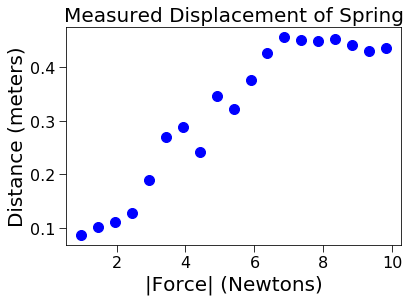

In [16]:
plotData('database/springData.txt')

<br>
<br>
<font size=5>What do yo think about this dataset?
<br>
<br>
Does the behaviour seems to be linear?    
<br>
<br>
For this excercise we will assume it is linear and use the training data to find a matematical relationship betwen the input and the output, as shown in the next picture.
<br>
<br>
<img src="pictures/lridea.jpg"/>
<br>
<br>
We will make an asumption on f, and supose it is somithing like this:
<br>
<br>
 $ f(x) = x\beta_1 +\beta_0$    
<br>
<br>   
And we will use the dataset to find $\beta_1$ and $\beta_0$
<br>
<br>
<img src="pictures/lrnotation.jpg"/>
<br>
<br>
</font>

<hr>
# Cost function
<br>
<br>
<font size=5>If we consider the equiation  $ f(x) = x\beta_1 +\beta_0$, it is evident there is an infinite number of combinations of $\beta_1$ and $\beta_0$.
<br>
<br>
In the next picture we can see lines that represent different values of $\beta_1$ and $\beta_0$.
<br>
<br>
<img src="pictures/lines.jpg"/>
<br>
<font size=5>How can we decide wich is a better model for these specific data?</font>
<br>
<br>
 There must be some kind of criterion to determine the best fit.
<br>
<br>
<img src="pictures/distance.jpg"/>
<br>
<br>
And taking this in consideration we define a cost function like this:
<br>
<br>
 $ J(\beta_0,\beta_1) = \frac{1}{2m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)})^2$    
<br>
<br>
Where i denotes each one of the data points in the dataset.
<br>
<br>
An our goal is to minimize the function like this:
<br>
<br>
$ \displaystyle{\min_{\beta_0,\beta_1} J(\beta_0,\beta_1)}$
<br>
<br>
And we really need to undrestand the meaning of each one of the functions that we are evaluating here: $f(x)$ and $J(\beta_0,\beta_1)$.
<br>
<br>
The following picture shows a representation of $J(\beta_0,\beta_1)$.
<br>
<br>
<img src="pictures/costfunction.jpg"/>
<br>
<br>
And what we want to do is to find the values of $\beta_1$ and $\beta_0$ that guarantee the minimun possible value of $J(\beta_0,\beta_1)$.
<br>
<br>
An interesting thing we can see here is that (given a quadratic cost function) we can see there is only one minimun.
<br>
<br>
The question now is: how do we find these values?
 </font>

<hr>
# Gradiente descent
<br>
<br>
<font size=5>Gradient descent is an iterative optimization algorithm for finding the minimum of a function.
<br>
<br>
We can outline the algorithm in the following way.
<br>
<br>
- We have a funtion to minimize, in our case $J(\beta_0,\beta_1)$
<br>
<br>
- We start with some ramdom values for $\beta_1$ and $\beta_0$.
<br>
<br>
- We change $\beta_1$ and $\beta_0$ iteratively to reduce $J(\beta_0,\beta_1)$ acording to a given rule until convergence
<br>
<br>
- We hope we don't get stucked at al local minimun
<br>
<br>

To do this, we use the following equation
<br>
<br>
$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0,\beta_1)$
<br>
<br>    
Let´s see this with a graphical example before we get into matematical detail:
<br>
<br>
Imagine yo have an function to minimize that looks like this:
<br>
<br>
<img src="pictures/gdexample1.jpg" alt="drawing" width="600"/>
<br>
<font size=5>Notice that, to make it simpler, in this example there is only one varible, and $ f(x) = x\beta_1$  so that $J(\beta_1)$</font>.
<br>
<br>
 To start the minimization process wi will start with a random value of  $\beta_1$, wich would correspond to a a given value of $J(\beta_1)$.
<br>
<br>
 As shown in the following picture, what the gradient descent algorithm do is search for direction in wich the function decreases and give a little step "down the hill", and continue to do this iteratively until, eventually, we find the minimun.
<br>
<br>
<img src="pictures/gdexample3.jpg" alt="drawing" width="600"/>
<br>
<br>
To understand how htis work, lets talk about the equation that tell us how to change $\beta_1$. for this particular example that has only one variable the equation would be:
<br>
<br>
$ \beta_1 := \beta_1 - \alpha \frac{d }{d \beta_1} J(\beta_1)$
<br>
<br>
<img src="pictures/gdexample2.jpg" alt="drawing" width="600"/>
<br>
<br>
And if we look at the last pictures and analize the equation, we can see that the derivative term in giving us the slope of the tangent (shown in green). In this particualre case the line has a positive slope and, thus, a positive derivative.  This means that what we will do is move the value of $\beta_1$ to the left, or decrease it. And we can se that in this case it will help to reduce $J(\beta_1)$. The term $\alpha$ will define how big is the step we take in each iteratrion.
<br>
<br>
If we have a different start value of $\beta_1$, as shown in the following picture, we can have a negative slope, wich would make the value of $\beta_1$ move to the rigth or increase.
<br>
<br>
<img src="pictures/gdexample4.jpg" alt="drawing" width="600"/>
<br>
<br>
It is important to notice the effect taht the choise of $\alpha$ may have in the performance of the algorithm. In the next picture we can see an example of wath can happend if $\alpha$ is either to small or to large.
<br>
<br>
<img src="pictures/gdexample5.jpg" alt="drawing" width="1000"/>
<br>
<br>
An what we see in the left is that if $\alpha$ is too small the algorithm can be slow and take a lot of steps before finding the minimun. In the right we can see that if $\alpha$ is to large the algorith can diverge instead of converge. 
<br>
<br>
And now that we have an idea of wath the gradient descent algorithm do, we can see in detail the equations that we would use to update the values in the case that we are studing to minimize $J(\beta_0,\beta_1)$ regarding the spring example.

$ \beta_0 := \beta_0 - \alpha \frac{1 }{m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)})$ 
<br>
<br>
$ \beta_1 := \beta_1 - \alpha \frac{1 }{m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)}) x^{(i)}$ 
<br>
<br>
$J\beta_0$ and $\beta_1$ are updated simultaneously and we repeat until convergence.
<br>
<br>
In our original spring example the cost function has two paraeters, and we can visualize it as shown in the following example, were th epoint is symbolizing a random start point from wich we start the minimization process giving little steps "down the hill".
<br>
<br>
<img src="pictures/costfunction2.jpg"/>
<br>
<br>
Luckly, we have already a tool we can use to find linear regression called polyfit. Let's use it in our spring data.In the next cell you will fnd a function to fit the data to a linear modela and plot it.
<br>
<br>

('Intercept: \n', array([0.0656286]))
('Coefficients: \n', array([[0.45549825]]))
('m =', array([[0.45549825]]), 'b =', array([0.0656286]))


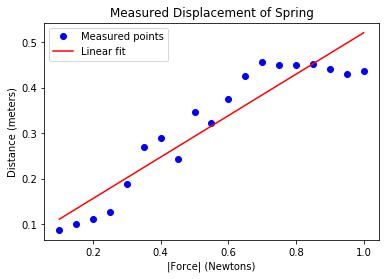

('MSE', array([0.0020916]))


In [2]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
x=np.loadtxt('database/springData.txt',skiprows=1, usecols=[1])
y=np.loadtxt('database/springData.txt',skiprows=1, usecols=[0])

#convert data in a dataframe, necesary for using linear regression function fron sklearn
X=DataFrame(x)
Y=DataFrame(y)

#Creating a model
regr = linear_model.LinearRegression()

#Fitting model to our data
regr.fit(X, Y)

#print ther results
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#save intecept and coefficients
b=regr.intercept_
a=regr.coef_

#plot inicial data
plt.plot(x, y, 'bo',label = 'Measured points')
plt.title('Measured Displacement of Spring')
plt.xlabel('|Force| (Newtons)')
plt.ylabel('Distance (meters)')

#use the model to compute the output
yout = np.transpose(a*x + b)
print('m =', a, 'b =', b)


#plot the model output
plt.plot(x,yout,'r', label='Linear fit')
plt.legend(loc = 'best')
plt.show()  

#
error=0;
for i in range (0, len(y)):
    error=error+((y[i]-yout[i])**2)
error=error/(len(y))
print ('MSE', error)

<br>
<br>
<font size=5>Now we need to see how this model behaves in the presence of new data. We are going to use new measurments as validation data.

<br>
<br>

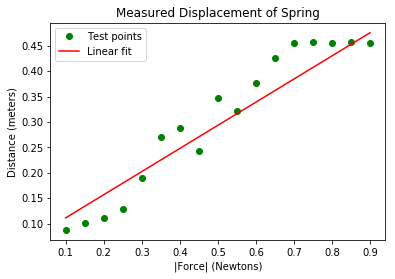

('MSE', array([0.00166038]))


In [3]:
# Load dataset
xt=np.loadtxt('database/springData2.txt',skiprows=1, usecols=[1])
yt=np.loadtxt('database/springData2.txt',skiprows=1, usecols=[0])

#plot dataset

plt.plot(xt, yt, 'go',label = 'Test points')
plt.title('Measured Displacement of Spring')
plt.xlabel('|Force| (Newtons)')
plt.ylabel('Distance (meters)')

#compute the model output to this new dataset
youtt = np.transpose(a*xt + b)

#plot model output
plt.plot(xt,youtt,'r', label='Linear fit')
plt.legend(loc = 'best')
plt.show()  

error=0;
for i in range (0, len(yt)):
    error=error+((yt[i]-youtt[i])**2)
error=error/(len(yt))
print ('MSE', error)

<br>
<br>
<font size=5>And we can se that there are some errors in this model.
<br>
<br>
¿Which do you think can be the origins of this error?
<br>
<br>


# Linear regression with multiple variables
<br>
<br>
<font size=5>The spring example is interesting to analize linear regression, but now we need to see how to extend this result to use int in porblems when we have multimple input features.  </font>
<br>
<br>
<font size=5> Let's take a look to the linear regression model we had.
<br>
<br>
 $ f(x) = \beta_0 + x\beta_1 $    
<br>
<br>
In this case we have only one input feature. And inf we have a larger set of features (n) we can express our model as:
<br>
<br>
 $ f(x) = \beta_0 + x_1\beta_1 + x_2\beta_2 + x_3\beta_3 + ... + x_n\beta_n$
<br>
<br>
But it is easier to represent this using matrices. For convenience of notation, we are going to define a $X_0=1$, like this.
<br>
<br>
$ f(x) = x_0\beta_0 + x_1\beta_1 + x_2\beta_2 + x_3\beta_3 + ... + x_n\beta_n$
<br>
<br>
This way, our input is going to be a vector, as well as the coeficients:
<br>
<br> 
$ \mathbf{x}= \begin{bmatrix} x_0 \\x_1\\x_2\\.\\.\\.\\x_n\end{bmatrix} \in \mathbb{R}^{n+1}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  $ \mathbf{\beta}= \begin{bmatrix} \beta_0 \\ \beta_1\\ \beta_2\\.\\.\\.\\ \beta_n\end{bmatrix} \in \mathbb{R}^{n+1}$
<br>
<br>
And we can express the model as
<br>
<br>
$f(x)=\mathbf{\beta}^T\mathbf{x}$
<br>
<br>
And the costo function will have the following structure:
<br>
<br>
 $ J(\beta) = \frac{1}{2m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)})^2$    
<br>
<br>
<br>
<br>
And remember that the update rule for gradient descent would be 
<br>
<br>
$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0,\beta_1)$
<br>
<br>
That is 
<br>
<br>
$ \beta_0 := \beta_0 - \alpha \frac{1 }{m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)}) x_0^{(i)}$ 
<br>
<br>
$ \beta_1 := \beta_1 - \alpha \frac{1 }{m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)}) x_1^{(i)}$ 
<br>
<br>
$ \beta_2 := \beta_2 - \alpha \frac{1 }{m} \sum_{i=1}^m (f(x^{(i)}) -y^{(i)}) x_2^{(i)}$ 
<br>
<br>
And so on
<br>
<br>
We will take a new database to study this example. This database contains inforamtion about body fat from diferent subject and its raltion with measurments of thight, triceps and mid arm.


In [4]:
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm

#Load data

x=np.loadtxt('database/bodyfat.txt',skiprows=1, usecols=[0,1,2])
y=np.loadtxt('database/bodyfat.txt',skiprows=1, usecols=[3])

# convert data to dataframe to use linear regression function
X=DataFrame(x)
Y=DataFrame(y)

#create and fit model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

#create an array that will contain values of beta
beta=np.zeros((1,4))

#print intercept and coeficients
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#beta 0 will be the intercept and we have to store it in column 0 of the matriz beta. The rest of the coefficnets also will be saved in beta
beta[0,0]=regr.intercept_
beta[0,1:4]=regr.coef_
#print coeficients
print(beta)


('Intercept: \n', array([117.08469478]))
('Coefficients: \n', array([[ 4.33409201, -2.85684794, -2.18606025]]))
[[117.08469478   4.33409201  -2.85684794  -2.18606025]]


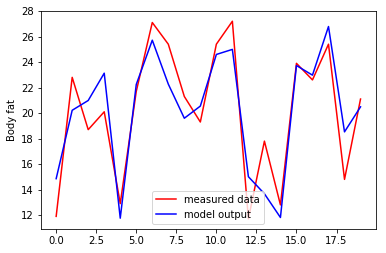

('MSE', array([4.92024441]))


In [5]:
import numpy as np
import matplotlib.pyplot as plt

#create a matrix to test data. Remember that we have an X0=1, we need to "expand" matrix x to contain a first column whos values are 1
xtest= np.ones((20,4))
xtest[:,1:4]=x

#use model to find output to input data
ytest= np.transpose(np.dot(beta, np.transpose(xtest)))

#plot origicnal data
plt.plot(y,'r', label= 'measured data')
#plot model output
plt.plot(ytest,'b', label= 'model output')
plt.ylabel('Body fat')
plt.legend(loc = 'best')
plt.show()

#compute MSE
error=0;
for i in range (0, len(y)):
    error=error+((y[i]-ytest[i])**2)
error=error/(len(y))
print ('MSE', error)
    

<hr>
# Polinomial Regression
<br>
<br>
<font size=5>The porcedure we just learned can also be used to performe polinbomila regression. We only have to define our features in a conveninet way like this. 
<br>
<br>
 $ f(x) = x^2\beta_2+ x\beta_1 +\beta_0$  
 <br>
 <br>
And here we have that we can have a "feature" that we define as the square of x.
 <br>
 <br>
 And just like that we could choose to build a polinomial model. An important thing to have into an acount in this case is overfitong.
 <br>
<br>
<img src="pictures/overfitting.jpg"/>
<br>
<br>
</font>
<br>